In [35]:
import joblib
import tensorflow as tf
from sklearn.ensemble import StackingRegressor
from keras_functions import r2_keras,build_model

model_gradient = joblib.load('./final_model/gradient_bossting.pkl')
model_neural = tf.keras.models.load_model('./final_model/neural_network.keras')
with open('./final_model/stacking_model.pkl', 'rb') as f:
    loaded_model: StackingRegressor  = joblib.load(f)


c:\Users\jongm\OneDrive\Documents\Cours\EPSI\mspr data\MSPR-Analyse-de-donnees\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\jongm\OneDrive\Documents\Cours\EPSI\mspr data\MSPR-Analyse-de-donnees\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\jongm\OneDrive\Documents\Cours\EPSI\mspr data\MSPR-Analyse-de-donnees\venv

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_pred = pd.read_csv('./donnees_predictions.csv')
le = LabelEncoder()

df_pred['nom'] = le.fit_transform(df_pred['nom'])

X_2023= df_pred[["part_pauvres_diff","part_modestes_diff","part_medians_diff","part_plutot_aises_diff",
                 "part_aises_diff","actemp","actcho","inactret","age_moyen","total_voix_par_ville","nom"
                 ,"insecurite","taux_chomage_moyen"]].copy()

df_all = pd.read_csv('./all_donnees.csv')
le = LabelEncoder()
df_all['nom'] = le.fit_transform(df_all['nom'])

y_2022= df_all[['pourcentage_voix']].copy()

X_2022= df_all[["part_pauvres_diff","part_modestes_diff","part_medians_diff","part_plutot_aises_diff",
                 "part_aises_diff","actemp","actcho","inactret","age_moyen","total_voix_par_ville","nom"
                 ,"insecurite","taux_chomage_moyen"]].copy()

In [77]:
encoded_labels = df_pred['nom'].values
df_pred['nom'] = le.inverse_transform(encoded_labels)

In [42]:
y_2023 = loaded_model.predict(X_2023)
y_pred_2022 = loaded_model.predict(X_2022)

In [44]:
df_pred['prediction_voix'] = y_2023

In [64]:
df_pred['prediction_voix'] = df_pred['prediction_voix'].apply(lambda x: x if x>0 else 0)
df_pred['voix'] = df_pred['prediction_voix'] * df_pred['total_voix_par_ville'] // 100

In [71]:
df_pred

,libdep,circo,part_pauvres_diff,part_modestes_diff,part_medians_diff,part_plutot_aises_diff,part_aises_diff,actemp,actcho,inactret,age_moyen,libelle_commune,total_voix_par_ville,catégorie,nom,code_insee,insecurite,taux_chomage_moyen,prediction_voix,voix
0,Aisne,2004,19.6,31.1,27.1,17.4,4.9,34.8,8.3,24.6,41.7,Abbécourt,388,Petite ville,0,2001,0.0,10.400000,0.864629,3.0
1,Aisne,2004,19.6,31.1,27.1,17.4,4.9,34.8,8.3,24.6,41.7,Abbécourt,388,Petite ville,10,2001,0.0,10.400000,2.486408,9.0
2,Aisne,2004,19.6,31.1,27.1,17.4,4.9,34.8,8.3,24.6,41.7,Abbécourt,388,Petite ville,6,2001,0.0,10.400000,16.525297,64.0
3,Aisne,2004,19.6,31.1,27.1,17.4,4.9,34.8,8.3,24.6,41.7,Abbécourt,388,Petite ville,4,2001,0.0,10.400000,2.665955,10.0
4,Aisne,2004,19.6,31.1,27.1,17.4,4.9,34.8,8.3,24.6,41.7,Abbécourt,388,Petite ville,5,2001,0.0,10.400000,30.672580,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56935,Somme,80001,20.3,31.1,26.1,17.8,4.7,35.4,8.3,22.6,40.5,Yonval,201,Petite ville,8,80836,0.0,8.666667,0.578530,1.0
56936,Somme,80001,20.3,31.1,26.1,17.8,4.7,35.4,8.3,22.6,40.5,Yonval,201,Petite ville,1,80836,0.0,8.666667,1.810264,3.0
56937,Somme,80001,20.3,31.1,26.1,17.8,4.7,35.4,8.3,22.6,40.5,Yonval,201,Petite ville,12,80836,0.0,8.666667,19.037583,38.0
56938,Somme,80001,20.3,31.1,26.1,17.8,4.7,35.4,8.3,22.6,40.5,Yonval,201,Petite ville,13,80836,0.0,8.666667,0.883747,1.0


In [60]:
import matplotlib.pyplot as plt

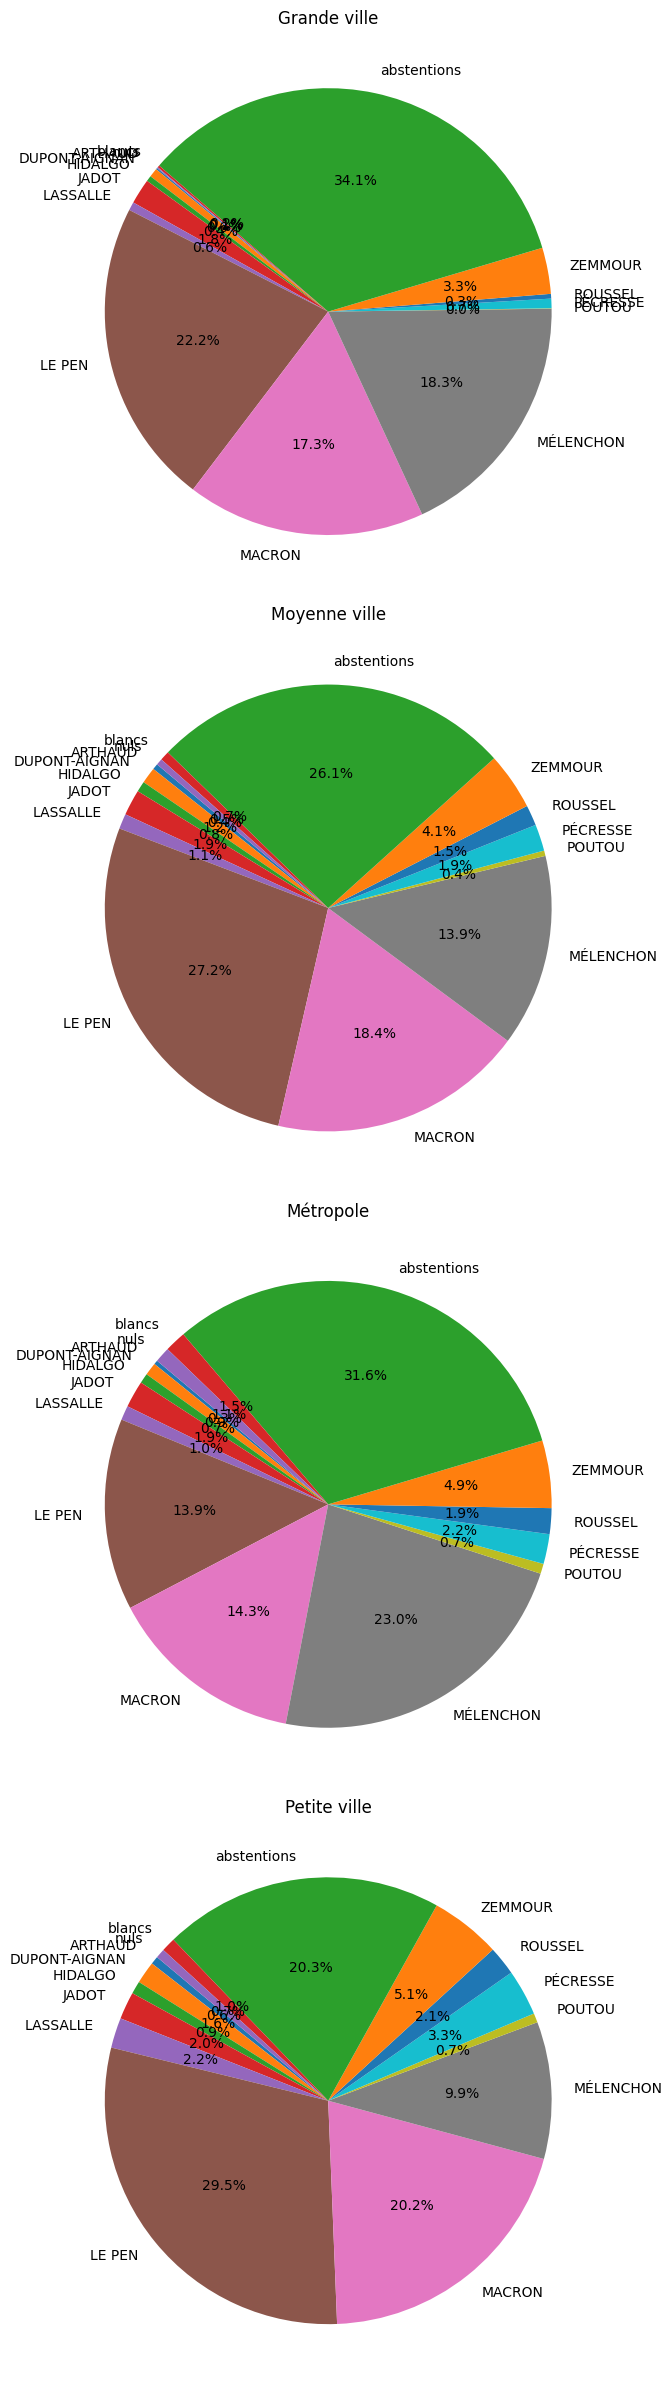

In [80]:
data_unique = df_pred.drop_duplicates(subset=['libelle_commune', 'catégorie', 'nom', 'voix'])
pivot_data = data_unique.pivot_table(index='nom', columns='catégorie', values='voix', aggfunc='sum').fillna(0)

fig, axes = plt.subplots(len(pivot_data.columns), 1, figsize=(8, 6 * len(pivot_data.columns)))

for i, categorie in enumerate(pivot_data.columns):
    noms = pivot_data.index
    valeurs = pivot_data[categorie]
    axes[i].pie(valeurs, labels=noms, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(categorie)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

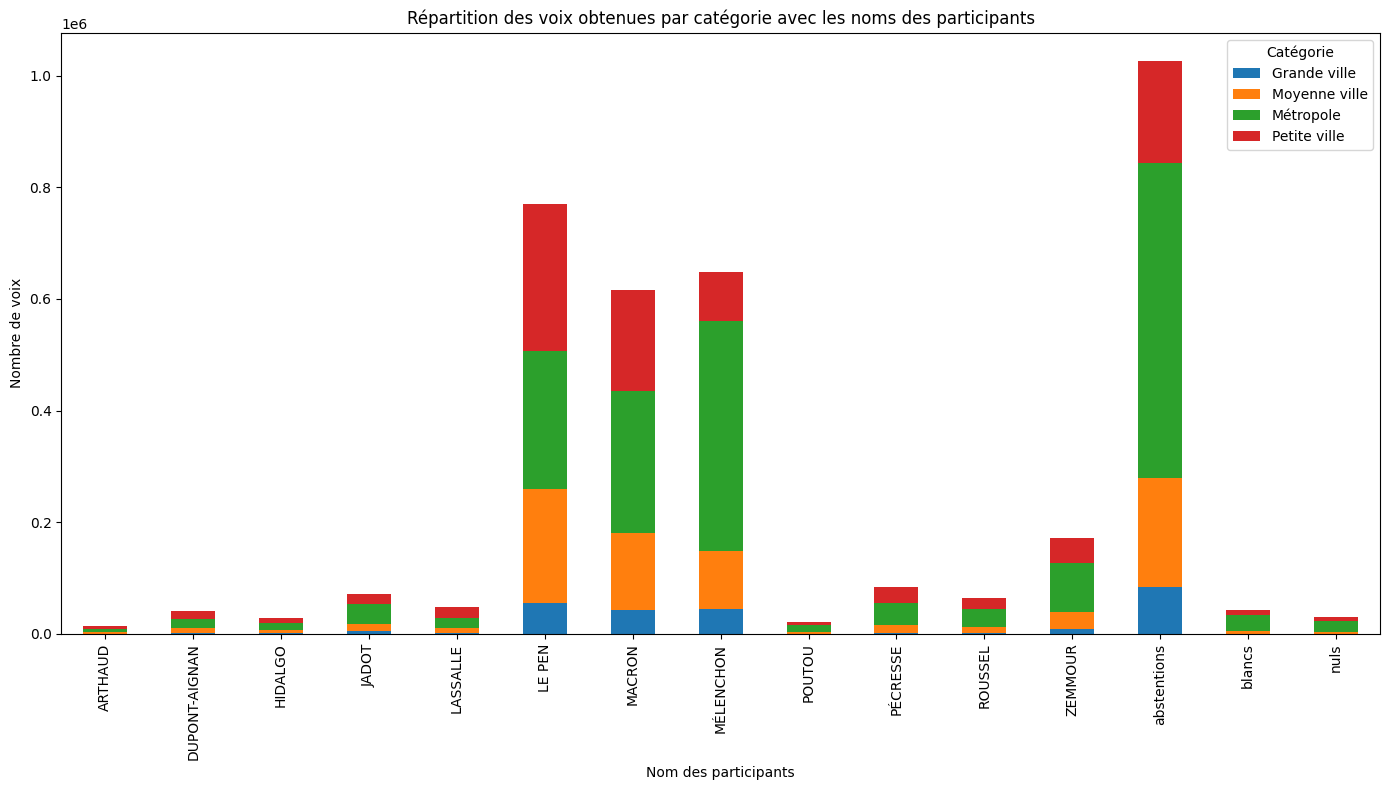

In [79]:
data_unique = df_pred.drop_duplicates(subset=['libelle_commune', 'catégorie', 'nom', 'voix'])
pivot_data = data_unique.pivot_table(index='nom', columns='catégorie', values='voix', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Répartition des voix obtenues par catégorie avec les noms des participants')
plt.xlabel('Nom des participants')
plt.ylabel('Nombre de voix')
plt.xticks(rotation=90)
plt.legend(title='Catégorie')
plt.tight_layout()

plt.show()